In [1]:
import os
import sys
root_folder = os.path.dirname(os.getcwd())
sys.path.append(root_folder)
from ResoFit._pulse_shape import NeutronPulse
from ResoFit._pulse_shape import ProtonPulse
from ResoFit.experiment import Experiment
import numpy as np
from ResoFit.simulation import Simulation
overwrite_csv = False
import scipy.signal as ss
import matplotlib.pyplot as plt
# import plotly
# plotly.offline.init_notebook_mode()
# import plotly.graph_objs as go

In [2]:
%matplotlib notebook

In [3]:
folder = 'data/IPTS_19558/reso_data_19558'
data_file1 = 'Gd_thick.csv'
spectra_file = 'Image002_Spectra.txt'
experiment1 = Experiment(data_file=data_file1,
                         spectra_file=spectra_file,
                         folder=folder,
                         baseline=False)
# experiment1.slice(slice_start=300, reset_index=False)
# peak_df = experiment1.find_peak()

<IPython.core.display.Javascript object>


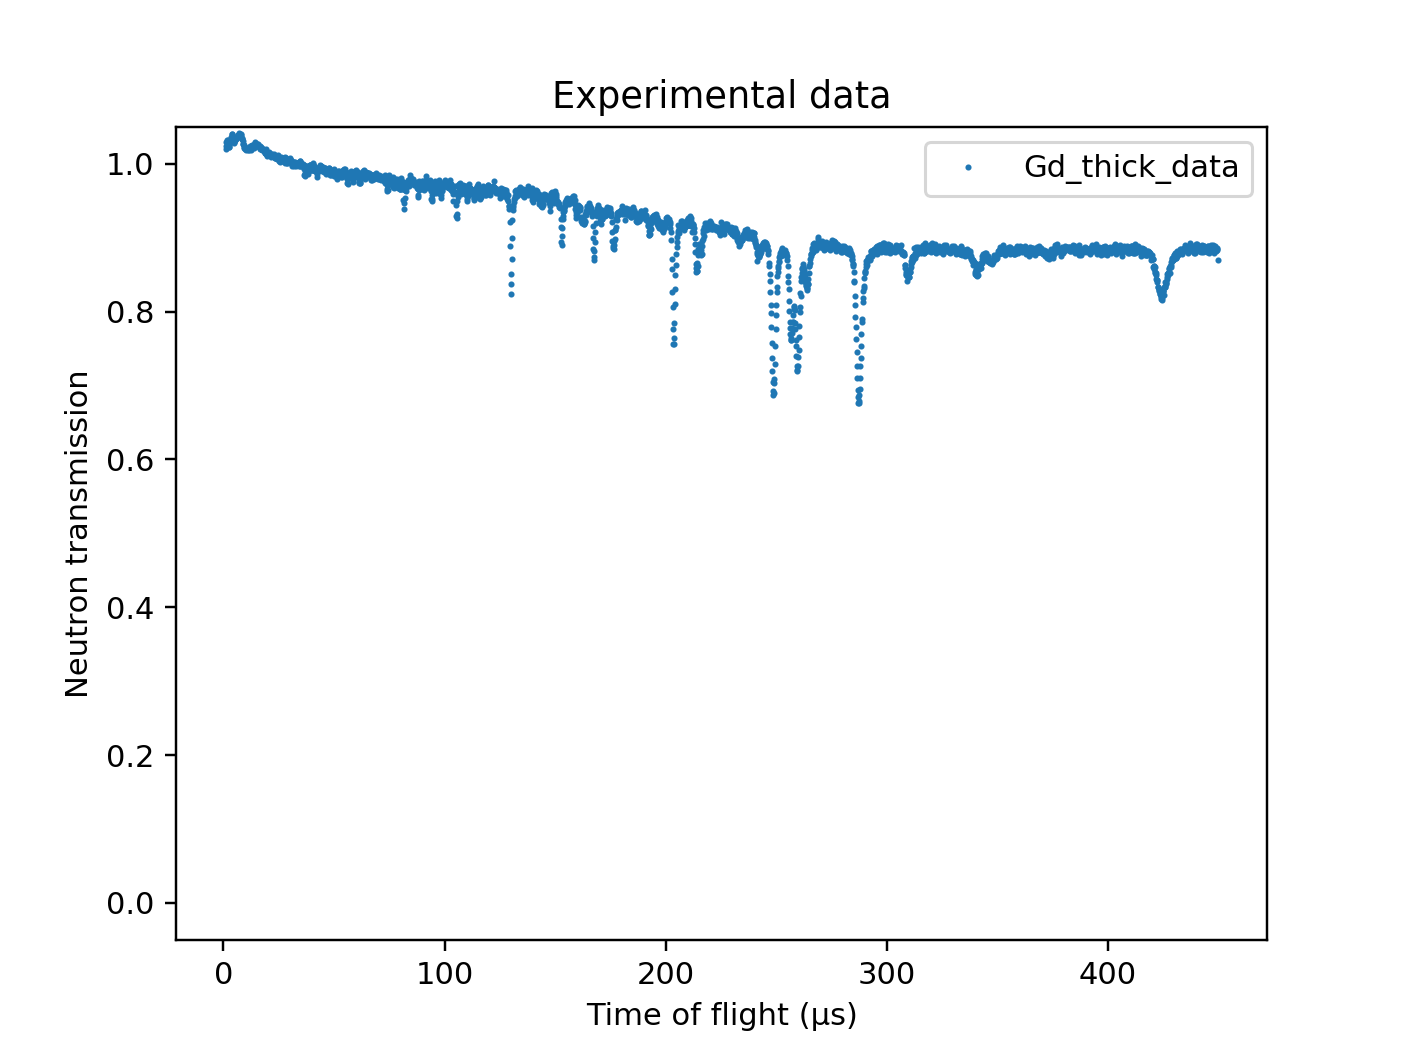

(-0.05, 1.05)

In [4]:
experiment1.plot(x_type='time', y_type='transmission', t_unit='us')
plt.ylim(top=1.05, bottom=-0.05)

In [5]:
# folder = 'data/IPTS_19558/reso_data_19558'
# data_file1 = 'Gd_thick.csv'
# spectra_file = 'Image002_Spectra.txt'
experiment2 = Experiment(data_file=data_file1,
                         spectra_file=spectra_file,
                         folder=folder,
                         baseline=True)
# experiment1.slice(slice_start=300, reset_index=False)
# peak_df = experiment1.find_peak()

<IPython.core.display.Javascript object>


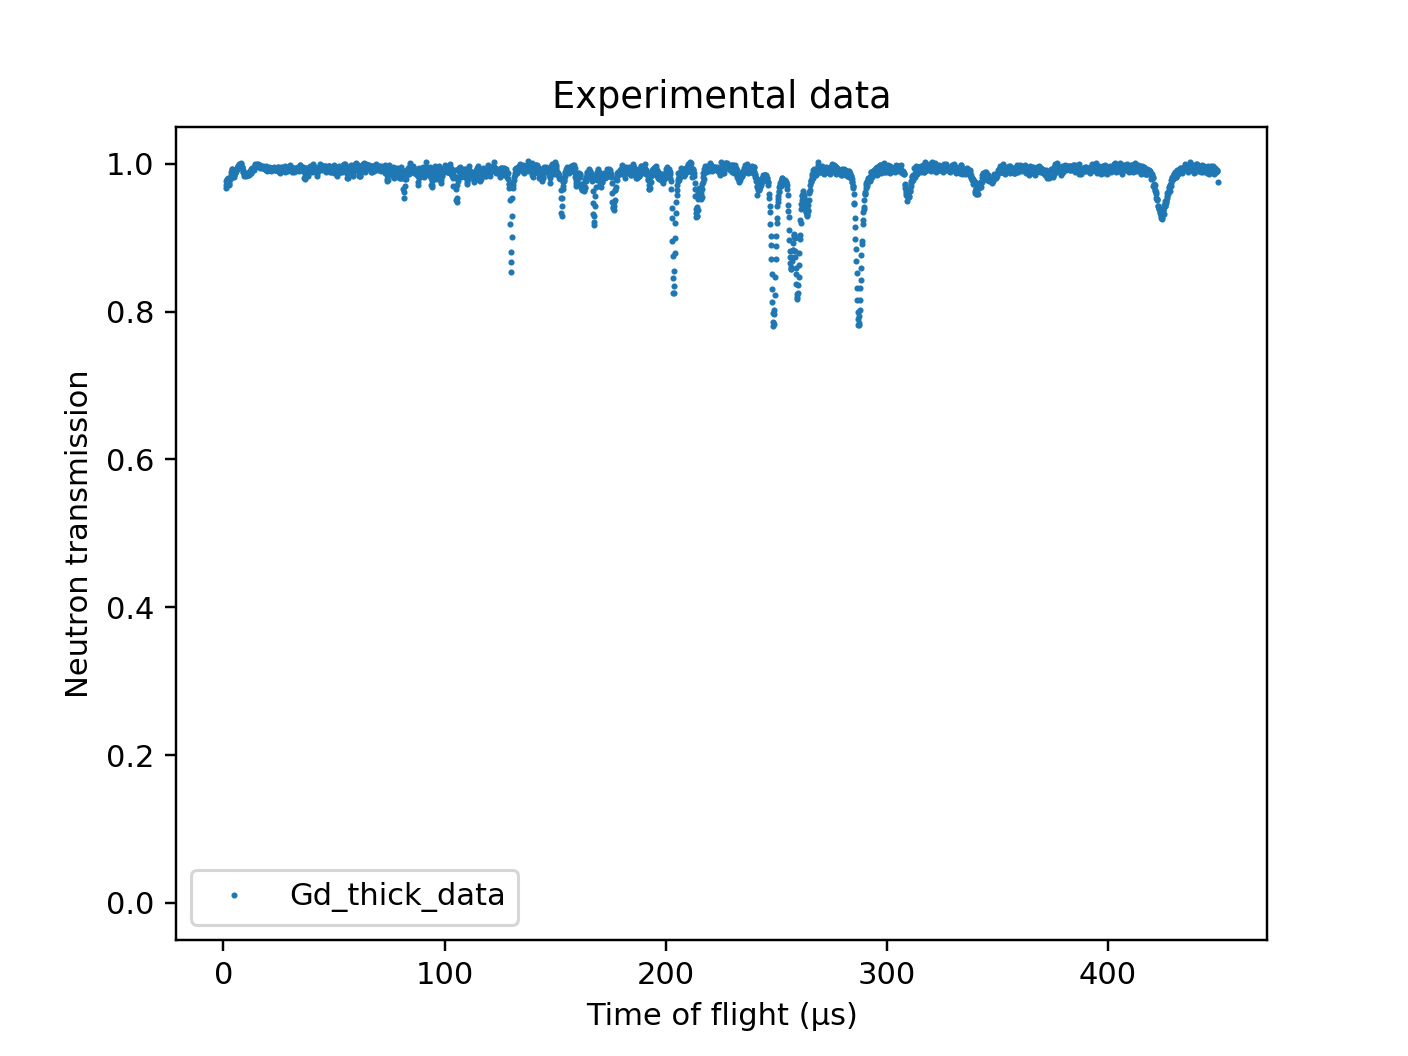

(-0.05, 1.05)

In [6]:
experiment2.plot(x_type='time', y_type='transmission', t_unit='us')
plt.ylim(top=1.05, bottom=-0.05)

In [ ]:
experiment2.find_peak()

In [3]:
source_to_detector_m = 16.45
simulation = Simulation(energy_min=7, energy_max=150, energy_step=0.1, database='ENDF_VII')
simulation.add_layer(layer='Gd', layer_thickness_mm=0.15)
simulation._convolve_neutron_beam_shape(source_to_detector_m=source_to_detector_m)

'/Users/y9z/Documents/GitHub/ResoFit/ResoFit/result/neutron_pulse/ikeda_carpenter/Neutron_fitted_params_1eV_500eV_ikeda_carpenter.csv' exists...
Fitted parameters file loaded.
'/Users/y9z/Documents/GitHub/ResoFit/ResoFit/result/neutron_pulse/ikeda_carpenter/Loglog_linear_within_1eV_500eV_ikeda_carpenter.csv' exists...
Parameters linear fitted file loaded.
'/Users/y9z/Documents/GitHub/ResoFit/ResoFit/result/neutron_pulse/ikeda_carpenter/TOF_shape_eV_7.0_150.0_0.1_us_0.05_5500000.0_184_for_sum_16.45m_ikeda_carpenter.csv' exists...
TOF neutron beam shape file loaded.


In [61]:
tof_us = simulation.neutron_pulse.shape_tof_df_interp['tof_us']

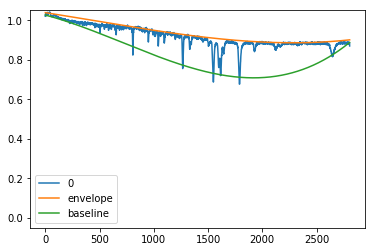

In [7]:
experiment1.data.plot()
envelope = pku.envelope(arr0)
plt.plot(envelope, label='envelope')
baseline = pku.baseline(arr0)
plt.plot(baseline, label='baseline')
plt.ylim(bottom=-0.05, top=1.05)
plt.legend()

(-0.05, 1.05)

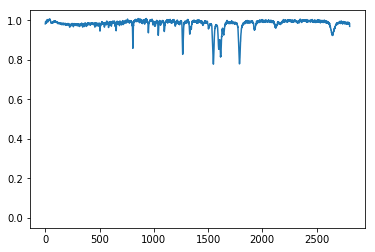

In [8]:
arr1 = arr0 + (1-envelope)
plt.plot(arr1)
plt.ylim(bottom=-0.05, top=1.05)